# Diabetes T1 Dataset Exploration

## Explore Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
import scipy.stats as stat
import seaborn as sb
plt.style.use('bmh')
import warnings
warnings.filterwarnings('ignore')

The data contains records for 70 patients with 20 attributes for each one, we would like to explore the dataset to see which values to select.

In [2]:
# 33 = Regular insulin dose
# 34 = NPH insulin dose
# 35 = UltraLente insulin dose
# 48 = Unspecified blood glucose measurement
# 57 = Unspecified blood glucose measurement
# 58 = Pre-breakfast blood glucose measurement
# 59 = Post-breakfast blood glucose measurement
# 60 = Pre-lunch blood glucose measurement
# 61 = Post-lunch blood glucose measurement
# 62 = Pre-supper blood glucose measurement
# 63 = Post-supper blood glucose measurement
# 64 = Pre-snack blood glucose measurement
# 65 = Hypoglycemic symptoms
# 66 = Typical meal ingestion
# 67 = More-than-usual meal ingestion
# 68 = Less-than-usual meal ingestion
# 69 = Typical exercise activity
# 70 = More-than-usual exercise activity
# 71 = Less-than-usual exercise activity
# 72 = Unspecified special event

code_dict={
            33: "Regular insulin dose",
            34: "NPH insulin dose",
            35: "UltraLente insulin dose",
           # 48: "Unspecified blood glucose measurement",
           # 57: "Unspecified blood glucose measurement",
            58: "Pre-breakfast blood glucose measurement",
            59: "Post-breakfast blood glucose measurement",
            60: "Pre-lunch blood glucose measurement",
            61: "Post-lunch blood glucose measurement",
            62: "Pre-supper blood glucose measurement",
            63: "Post-supper blood glucose measurement",
            64: "Pre-snack blood glucose measurement",
            65: "Hypoglycemic symptoms",
            66: "Typical meal ingestion",
            67: "More-than-usual meal ingestion",
            68: "Less-than-usual meal ingestion",
            69: "Typical exercise activity",
            70: "More-than-usual exercise activity",
            71: "Less-than-usual exercise activity",
            #72: "Unspecified special event",
            }

folder_path="C://personal//AllData//Diabetes//Diabetes-Data"
code_list=list(code_dict.keys())

In [3]:
p_list=[str("%02d" % (a,)) for a in range(1,71)]
print(p_list)
att_counts=np.zeros((len(p_list), len(code_list))).astype(int) 

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70']


In [4]:
for p_ind,p in enumerate(p_list):
    p_path=folder_path+"//data-"+p
    p_data=pd.read_csv(p_path,sep="\t",header=None)
    p_data.columns=["date","time","code","value"]
    #print("Rec.",p, " Total:",len(p_data))
    for code_ind, code in enumerate(code_list):
        p_data_sub=p_data[p_data["code"]==code]
        #print(p_data_sub.head(3))
        #print(code_dict[code],len(p_data_sub))
        att_counts[p_ind,code_ind]=len(p_data_sub)
    #print("-----------------------------")


In [5]:
att_counts_df=pd.DataFrame(att_counts)
att_counts_df.columns=code_dict.values()
att_counts_df.head()

,Regular insulin dose,NPH insulin dose,UltraLente insulin dose,Pre-breakfast blood glucose measurement,Post-breakfast blood glucose measurement,Pre-lunch blood glucose measurement,Post-lunch blood glucose measurement,Pre-supper blood glucose measurement,Post-supper blood glucose measurement,Pre-snack blood glucose measurement,Hypoglycemic symptoms,Typical meal ingestion,More-than-usual meal ingestion,Less-than-usual meal ingestion,Typical exercise activity,More-than-usual exercise activity,Less-than-usual exercise activity
0,384,139,0,135,0,54,0,102,0,0,51,0,0,0,0,0,0
1,378,3,0,96,0,95,0,95,0,0,0,0,0,0,0,0,0
2,60,1,73,40,0,25,5,30,21,16,3,0,10,0,0,0,0
3,69,58,18,35,0,26,2,32,10,32,1,0,6,0,0,0,0
4,72,76,0,37,0,25,1,33,7,36,0,0,2,0,0,0,0


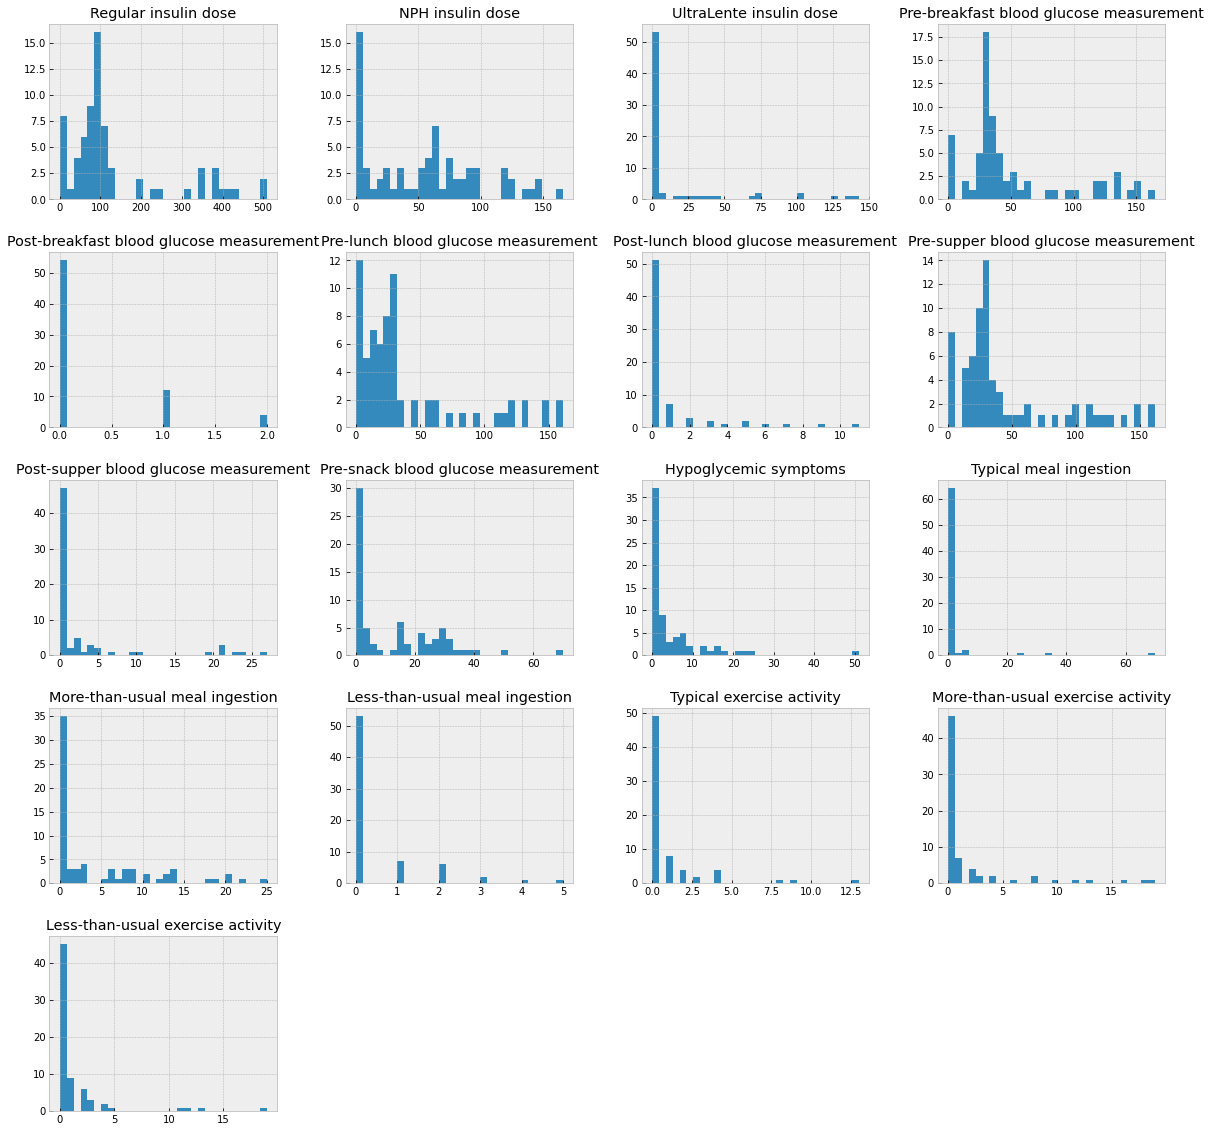

In [6]:
att_counts_df.hist(figsize=(20,20),bins=30);

In [21]:
# a function that returns a tuple of the start and end dates of patients data in dict
def time_span():
    time_span_dict={}
    for p_ind,p in enumerate(p_list):
        p_path=folder_path+"//data-"+p
        p_data=pd.read_csv(p_path,sep="\t",header=None)
        p_data.columns=["date","time","code","value"]
        time_span_dict[p]=(p_data.date[0],p_data.date[len(p_data)-1])
    return(time_span_dict)

In [23]:
time_span()

{'01': ('04-21-1991', '09-03-1991'),
 '02': ('10-10-1989', '01-13-1990'),
 '03': ('07-21-1990', '08-28-1990'),
 '04': ('08-19-1990', '09-26-1990'),
 '05': ('09-01-1990', '10-11-1990'),
 '06': ('04-29-1989', '05-23-1989'),
 '07': ('03-27-1989', '04-30-1989'),
 '08': ('07-31-1990', '09-05-1990'),
 '09': ('04-22-1990', '05-19-1990'),
 '10': ('02-18-1989', '03-23-1989'),
 '11': ('07-13-1990', '08-11-1990'),
 '12': ('07-22-1990', '09-04-1990'),
 '13': ('09-04-1990', '10-10-1990'),
 '14': ('03-11-1991', '04-20-1991'),
 '15': ('04-13-1991', '06-06-1991'),
 '16': ('05-22-1991', '07-17-1991'),
 '17': ('07-13-1990', '08-12-1990'),
 '18': ('08-18-1990', '09-19-1990'),
 '19': ('09-09-1990', '10-10-1990'),
 '20': ('05-12-1991', '09-23-1991'),
 '21': ('09-03-1989', '11-05-1989'),
 '22': ('03-14-1991', '04-27-1991'),
 '23': ('04-27-1991', '06-15-1991'),
 '24': ('05-28-1991', '07-13-1991'),
 '25': ('07-24-1990', '08-23-1990'),
 '26': ('07-13-1988', '01-27-1989'),
 '27': ('01-29-1989', '10-27-1989'),
 

In [15]:
p

'70'

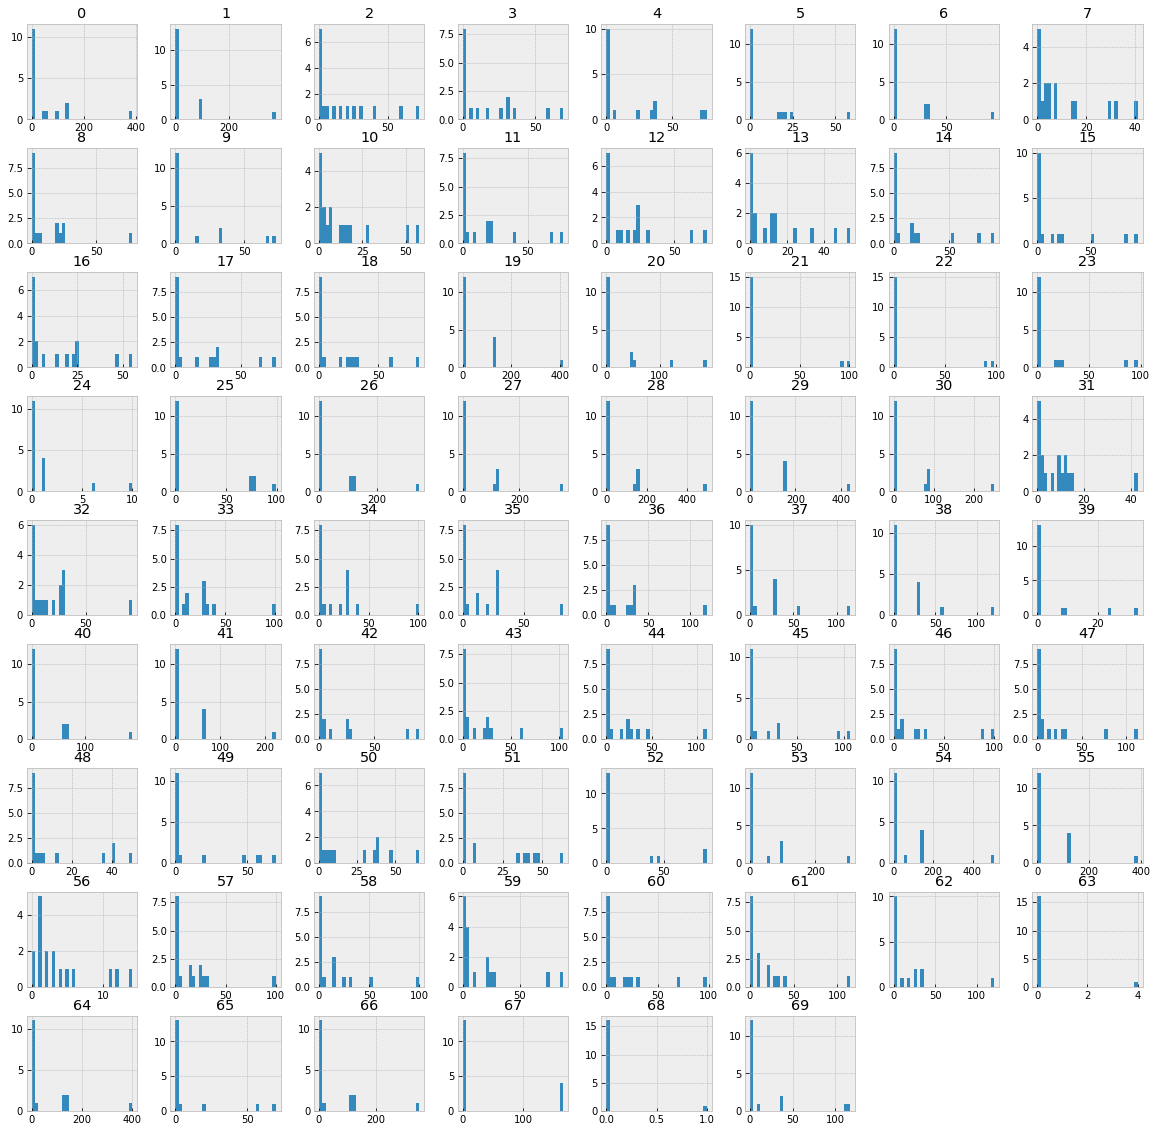

In [7]:
att_counts_df.T.hist(figsize=(20,20),bins=30);

In [ ]:
listings_file_path = "...//listings.csv"
nh_file_path = "...//neighbourhoods.csv"

listings=pd.read_csv(listings_file_path)
nhoods=pd.read_csv(nh_file_path)
print("Number of Listings:",len(listings))

display(nhoods)
display(listings.head())